## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Loading in Data

In [7]:
data_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'class']

df = pd.read_csv('data_seed.dat', sep='\\s+', engine='python', header=0, names=data_names)

display(df.head())

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


## Training KNN Classifier

In [8]:
k_values = [1, 5, 10, 15]

parameters = {
    'n_neighbors': k_values,
    }

knn = GridSearchCV(KNeighborsClassifier(), parameters, return_train_score=True)
knn = knn.fit(df[data_names[:-1]], df[data_names[-1]])

## Plotting Results

[0.11080139 0.12520325 0.09651568 0.11091754]


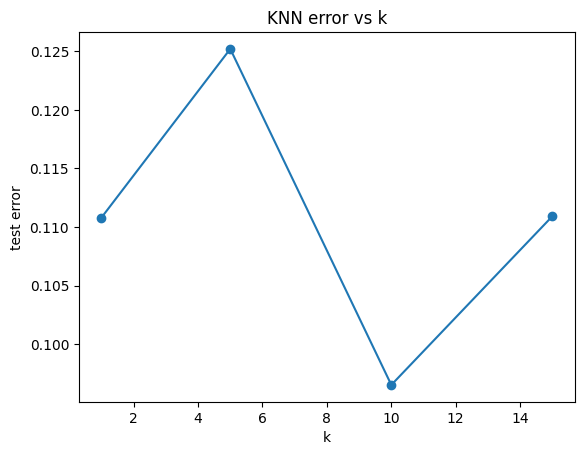

In [10]:
results = 1-knn.cv_results_['mean_test_score']
print(results)

plt.figure(1)
plt.clf()
plt.plot(k_values, results, 'o-')
plt.xlabel('k')
plt.ylabel('test error')
plt.title('KNN error vs k')
plt.show()